In [1]:
import sys; sys.path.insert(0, '..')

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import trajectory_reconstruction_tradeoff as T
import random
import scanpy as sc
import altair as alt
from altair_saver import save

random.seed(20)

In [2]:
dirname = '../output/datasets/' 

datasets = ['linear',
            'bifur_at_1',
            'bifur_at_2',
            'bifur_at_3',
            'bifur_at_1_to_3',
            'bifur_at_2_to_3',
            'bifur_at_1_to_4',
            ]

colors = ['blue', 'darkred', 'maroon', 'brown', 'firebrick', 'indianred', 'lightcoral', ]

In [3]:
# # read all data
# trajs = {}

# for dataset in datasets:
#     datafiles = glob.glob(os.path.join(dirname, f'{dataset}_rep*.h5ad'))
#     for datafile in datafiles:
#         dataname = os.path.basename(datafiles[0]).split('.')[0]
#         adata = sc.read_h5ad(datafile)
#         X = adata.X
#         meta = adata.obs
#         trajs[dataname] = T.tr.Trajectory(X, meta=meta)

In [ ]:
# # params
# Pvar = np.round(0.03 * 2 ** np.arange(0, 5, 0.6), 2)
# Pconst = np.ones_like(Pvar)
# repeats = 10

# # sample reads
# L_reads_dict = {}
# for traj_name, traj in trajs.items():
#     L_reads_dict[traj_name] = traj.compute_tradeoff(B=-1, Pt=Pvar, Pc=Pconst, repeats=repeats)
    
# L_reads = pd.concat(L_reads_dict).reset_index()
# L_reads['trajectory type'] = L_reads['level_0'].apply(lambda x: x.split('_rep')[0])
# L_reads['log pt'] = np.log(L_reads['pt'])

# L_reads.to_csv(os.path.join(dirname, 'prosstt_L_reads.csv'))
# print(L_reads.shape)

# # sample cells
# L_cells_dict = {}
# for traj_name, traj in trajs.items():
#     L_cells_dict[traj_name] = traj.compute_tradeoff(B=-1, Pt=Pconst, Pc=Pvar, repeats=repeats)

# L_cells = pd.concat(L_cells_dict).reset_index()
# L_cells['trajectory type'] = L_cells['level_0'].apply(lambda x: x.split('_rep')[0])
# L_cells['log pc'] = np.log(L_cells['pc'])


# L_cells.to_csv(os.path.join(dirname, 'prosstt_L_cells.csv'))
# print(L_cells.shape)


In [3]:
L_reads = pd.read_csv(os.path.join(dirname, 'prosstt_L_reads.csv'))
L_cells = pd.read_csv(os.path.join(dirname, 'prosstt_L_cells.csv'))

In [19]:
datasets = ['linear',
            'bifur_at_1',
            'bifur_at_2',
            'bifur_at_3',
#             'bifur_at_1_to_3',
            'bifur_at_2_to_3',
            'bifur_at_1_to_4',
            ]

colors = ['blue', 
        'darkred', 
        'maroon', 
        'brown', 
#         'firebrick', 
        'indianred', 
        'lightcoral', ]

In [16]:
len(np.round(0.03 * 2 ** np.arange(0, 5, 0.6), 2))

9

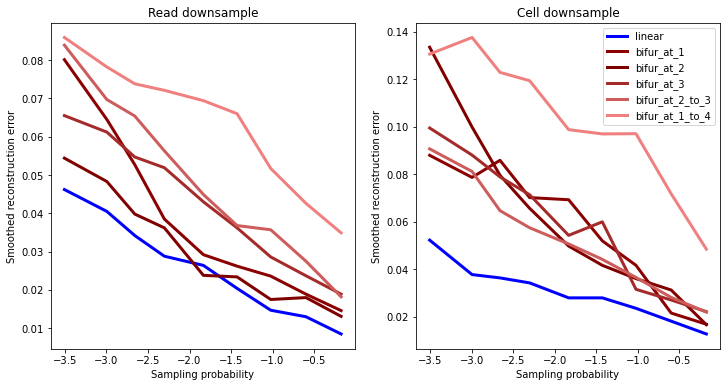

In [20]:
## Visualizing
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_title('Read downsample')
for data, color in zip(datasets, colors):
    sL = L_reads[L_reads['trajectory type'] == data]
    T.pl.plot_tradeoff(sL, xcol='log pt', color_mean=color, color_std=color, label=data, ax=ax[0], plot_std=0)
    
ax[1].set_title('Cell downsample')
for data, color in zip(datasets, colors):
    sL = L_cells[L_cells['trajectory type'] == data]
    T.pl.plot_tradeoff(sL, xcol='log pc', color_mean=color, color_std=color, label=data, ax=ax[1], plot_std=0)

ax[1].legend()

In [8]:
L_reads.shape

(630, 12)

In [ ]:
    

# ax[1].legend()

# # read dataset
# dataset = 'prosstt'
# B = 0.01
# Pc = np.round(0.03 * 2 ** np.arange(0, 5, 0.6), 2)
# Pc = Pc[Pc < 1]
# B = 0.01
# Pt = [B / pc for pc in Pc]

# # ncells = 1000
# # nsegs = 5
# # nper_seg = int(ncells / nsegs)
# # newick = '((((A:%d)B:%d)C:%d)D:%d)E:%d;' % ((nper_seg,) * nsegs)
# # X, D, meta = T.io.simulate(newick)


# X, D, meta = T.io.read_dataset(dataset=dataset, dirname=dirname)

# Pc = 
# Pc = Pc[Pc < 1]

# B = 0.01
# Pt = [B / pc for pc in Pc]


# Pc

# # read dataset
# dataset = 'prosstt'
# B = 0.01
# Pc = np.round(0.03 * 2 ** np.arange(0, 5, 0.6), 2)
# Pc = Pc[Pc < 1]
# B = 0.01
# Pt = [B / pc for pc in Pc]

# # ncells = 1000
# # nsegs = 5
# # nper_seg = int(ncells / nsegs)
# # newick = '((((A:%d)B:%d)C:%d)D:%d)E:%d;' % ((nper_seg,) * nsegs)
# # X, D, meta = T.io.simulate(newick)

# dirname = '/Users/nomo/PycharmProjects/Tree_Reconstruct_Limitations/datasets/' 
# X, D, meta = T.io.read_dataset(dataset=dataset, dirname=dirname)

# traj = T.tr.Trajectory(X, D=D, meta=meta)

# repeats = 20
# L_pc = traj.compute_tradeoff(B=-1, Pc=Pc, Pt=np.ones_like(Pc), repeats=repeats)
# L_pt = traj.compute_tradeoff(B=-1, Pt=Pt, Pc=np.ones_like(Pt), repeats=repeats)

# fig, ax = plt.subplots(1,2)
# T.pl.plot_tradeoff(L_pt, xcol='pt', ax=ax[0]); ax[0].set_title('pt subsample');
# T.pl.plot_tradeoff(L_pc, xcol='pc', ax=ax[1]); ax[1].set_title('pc subsample');

# mL_pt = L_pt.groupby('pt').mean()
# mL_pc = L_pc.groupby('pc').mean()

# fig, ax = plt.subplots(1,2)
# ax[0].plot(np.log(mL_pt.index), mL_pt['l1']); ax[0].set_title('pt subsample')
# ax[1].plot(np.log(mL_pc.index), np.log(mL_pc['l1'])); ax[1].set_title('pc subsample')
# ax[0].set_xlabel('log pt'); ax[0].set_ylabel('reconst error');
# ax[1].set_xlabel('log pt'); ax[1].set_ylabel('log reconst error');

# from sklearn.decomposition import PCA

# pts = mL_pt.index[:8]
# res2 = []
# for _ in range(repeats):
#     for pt in pts:
#         sX, psX, psD, sD, ix = traj.subsample(pc=1, pt=pt)
#         sDelta = (psX[:,0].max() - psX[:,0].min())
#         l1 = T.ds.compare_distances(psD, sD)[0]

#         sX = np.random.binomial(X, pt)
#         pca = PCA(n_components=10, svd_solver='full')
#         psX = pca.fit_transform(sX)
#         sDelta_nolog = (psX[:,0].max() - psX[:,0].min())
#         psD = T.ds.get_pairwise_distances(psX)[0]  
#         l1_nolog = T.ds.compare_distances(psD, traj.D)[0]

#         res2.append({'pt': pt, 'Delta': sDelta, 'l1': l1,'sDelta_nolog': sDelta_nolog, 'l1_nolog': l1_nolog})

# L2 = pd.DataFrame(res2)
# L2 = L2.groupby('pt').mean()
# L2['pt'] = L2.index

# fig,ax = plt.subplots(2,2, figsize=(10,10))
# ax[0,0].set_title('withlog')
# ax[0,0].scatter(L2['pt'], L2['Delta'], ); 
# ax[0,0].set_xlabel('pt')
# ax[0,0].set_ylabel('Delta')
# ax[0,1].scatter(L2['pt'], L2['sDelta_nolog'], );
# ax[0,1].set_xlabel('pt')
# ax[0,1].set_ylabel('sDelta_nolog')

# ax[0,1].set_title('without log')
# ax[1,0].scatter(L2['pt'], L2['l1'], );
# ax[1,0].set_xlabel('pt')
# ax[1,0].set_ylabel('l1')
# ax[1,1].scatter(L2['pt'], L2['l1_nolog'], );
# ax[1,1].set_xlabel('pt')
# ax[1,1].set_ylabel('l1_nolog')





# def curve_trajectory(nc, R=100):
#     nc = int(nc/2)
#     theta = np.linspace(0, np.pi, nc)
#     dtheta = theta[1]-theta[0]
#     d0 = R * dtheta

#     x = R * np.sin(theta)
#     y = R * np.cos(theta)

#     x=np.hstack((np.linspace(-314,0,nc), x))
#     y=np.hstack((np.linspace(100,100,nc), y))
#     return np.vstack((x,y)).T

# # generate latent space
# R = 100
# ncells = 1000
# pX = curve_trajectory(ncells, R=R)
# D = T.ds.get_pairwise_distances(pX)[0]
# D = D / np.max(D)

# Pc_curve = np.linspace(0.008, 0.08, 5)
# res = []
# for k in range(repeats):
#     for pc in Pc_curve:
#         n = int(ncells * pc)
#         ix = np.random.choice(ncells, n, replace=False)

#         sD = D[ix][:, ix]
#         sD = sD / np.max(sD)

#         psX = pX[ix,:]
#         psD = T.ds.get_pairwise_distances(psX)[0]
        
#         # compute error
#         l1, l2, l3, lsp = T.ds.compare_distances(psD, sD)
#         res.append({'pc': pc, 'l1': l1})

# delta = np.hstack((np.array([0]), np.cumsum(np.sqrt(np.diff(pX[:, 0])**2 + np.diff(pX[:,1])**2))))

# delta

# L_curve = pd.DataFrame(res)
# mL_curve = L_curve.groupby('pc').mean()
# plt.plot(np.log(mL_curve.index), np.log(mL_curve['l1'])); plt.xlabel('log pc subsample')
# plt.ylabel('log l1 ')


# plt.scatter(pX[:,0], pX[:,1])
# plt.scatter(psX[:,0], psX[:,1])

# fig,ax = plt.subplots(1,2)
# ax[0].imshow(sD)
# ax[1].imshow(psD)